In [1]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

In [2]:
def padding(image):
    m,n = image.shape
    
        # time to create a M+2 , N+2 matrix
    size = (m+2 , n+2)
    
        # Create a matrix with zeroes of the above size
    pad_im = np.zeros(size , dtype = int) 
    
        # use some moagic for paddig
    
    for i in range(m):
        for j in range(n):
            pad_im[i+1,j+1] = image[i,j]
    
    return pad_im

In [3]:
# the padding works perfectly , now its convolution time

In [4]:
def convolution(img, ker):
    image = padding(img) # padding the image
    kernel = ker.T       # flipping the kernel
    im_m  , im_n = image.shape
    k_m , k_n = kernel.shape
    
    # points at the middle of the kernel 
    map_x= k_m//2
    map_y = k_n//2
    
    fin = np.zeros_like(image)     # create an empty array (init with 0) with the same shape of the padded image
    
    for i in range(map_x , im_m - map_x):
        for j in range(map_y , im_n - map_y):
            suma = 0             
            
            for k in range(k_m):
                for l in range(k_n):
                    suma = suma + kernel[k][l]*image[i+k-map_x][j+l-map_y]
                    
            fin[i][j] = suma
            
    return fin

In [5]:
f = np.random.randint(0,9 , [5,5])

In [6]:
print(f)

[[3 0 6 0 3]
 [5 4 4 3 5]
 [1 5 0 7 0]
 [8 8 5 8 0]
 [4 6 6 3 5]]


In [7]:
filter1 = np.array([[0.125, 0.25, 0.], [0.125, 0.5, 0.], [0., 0., 0.]])

In [8]:
conv = convolution(f,filter1)

In [9]:
print(conv)

[[0 0 0 0 0 0 0]
 [0 1 0 3 1 1 0]
 [0 2 3 3 3 3 0]
 [0 1 3 2 4 2 0]
 [0 4 6 5 6 2 0]
 [0 3 6 6 4 4 0]
 [0 0 0 0 0 0 0]]


In [10]:
img = imageio.imread('images/fyodor.jpg' , as_gray=True)

In [11]:
median_filter = (1/9)*np.ones((3,3))

In [12]:
conv_im = (convolution(img, median_filter))

(-0.5, 832.5, 1025.5, -0.5)

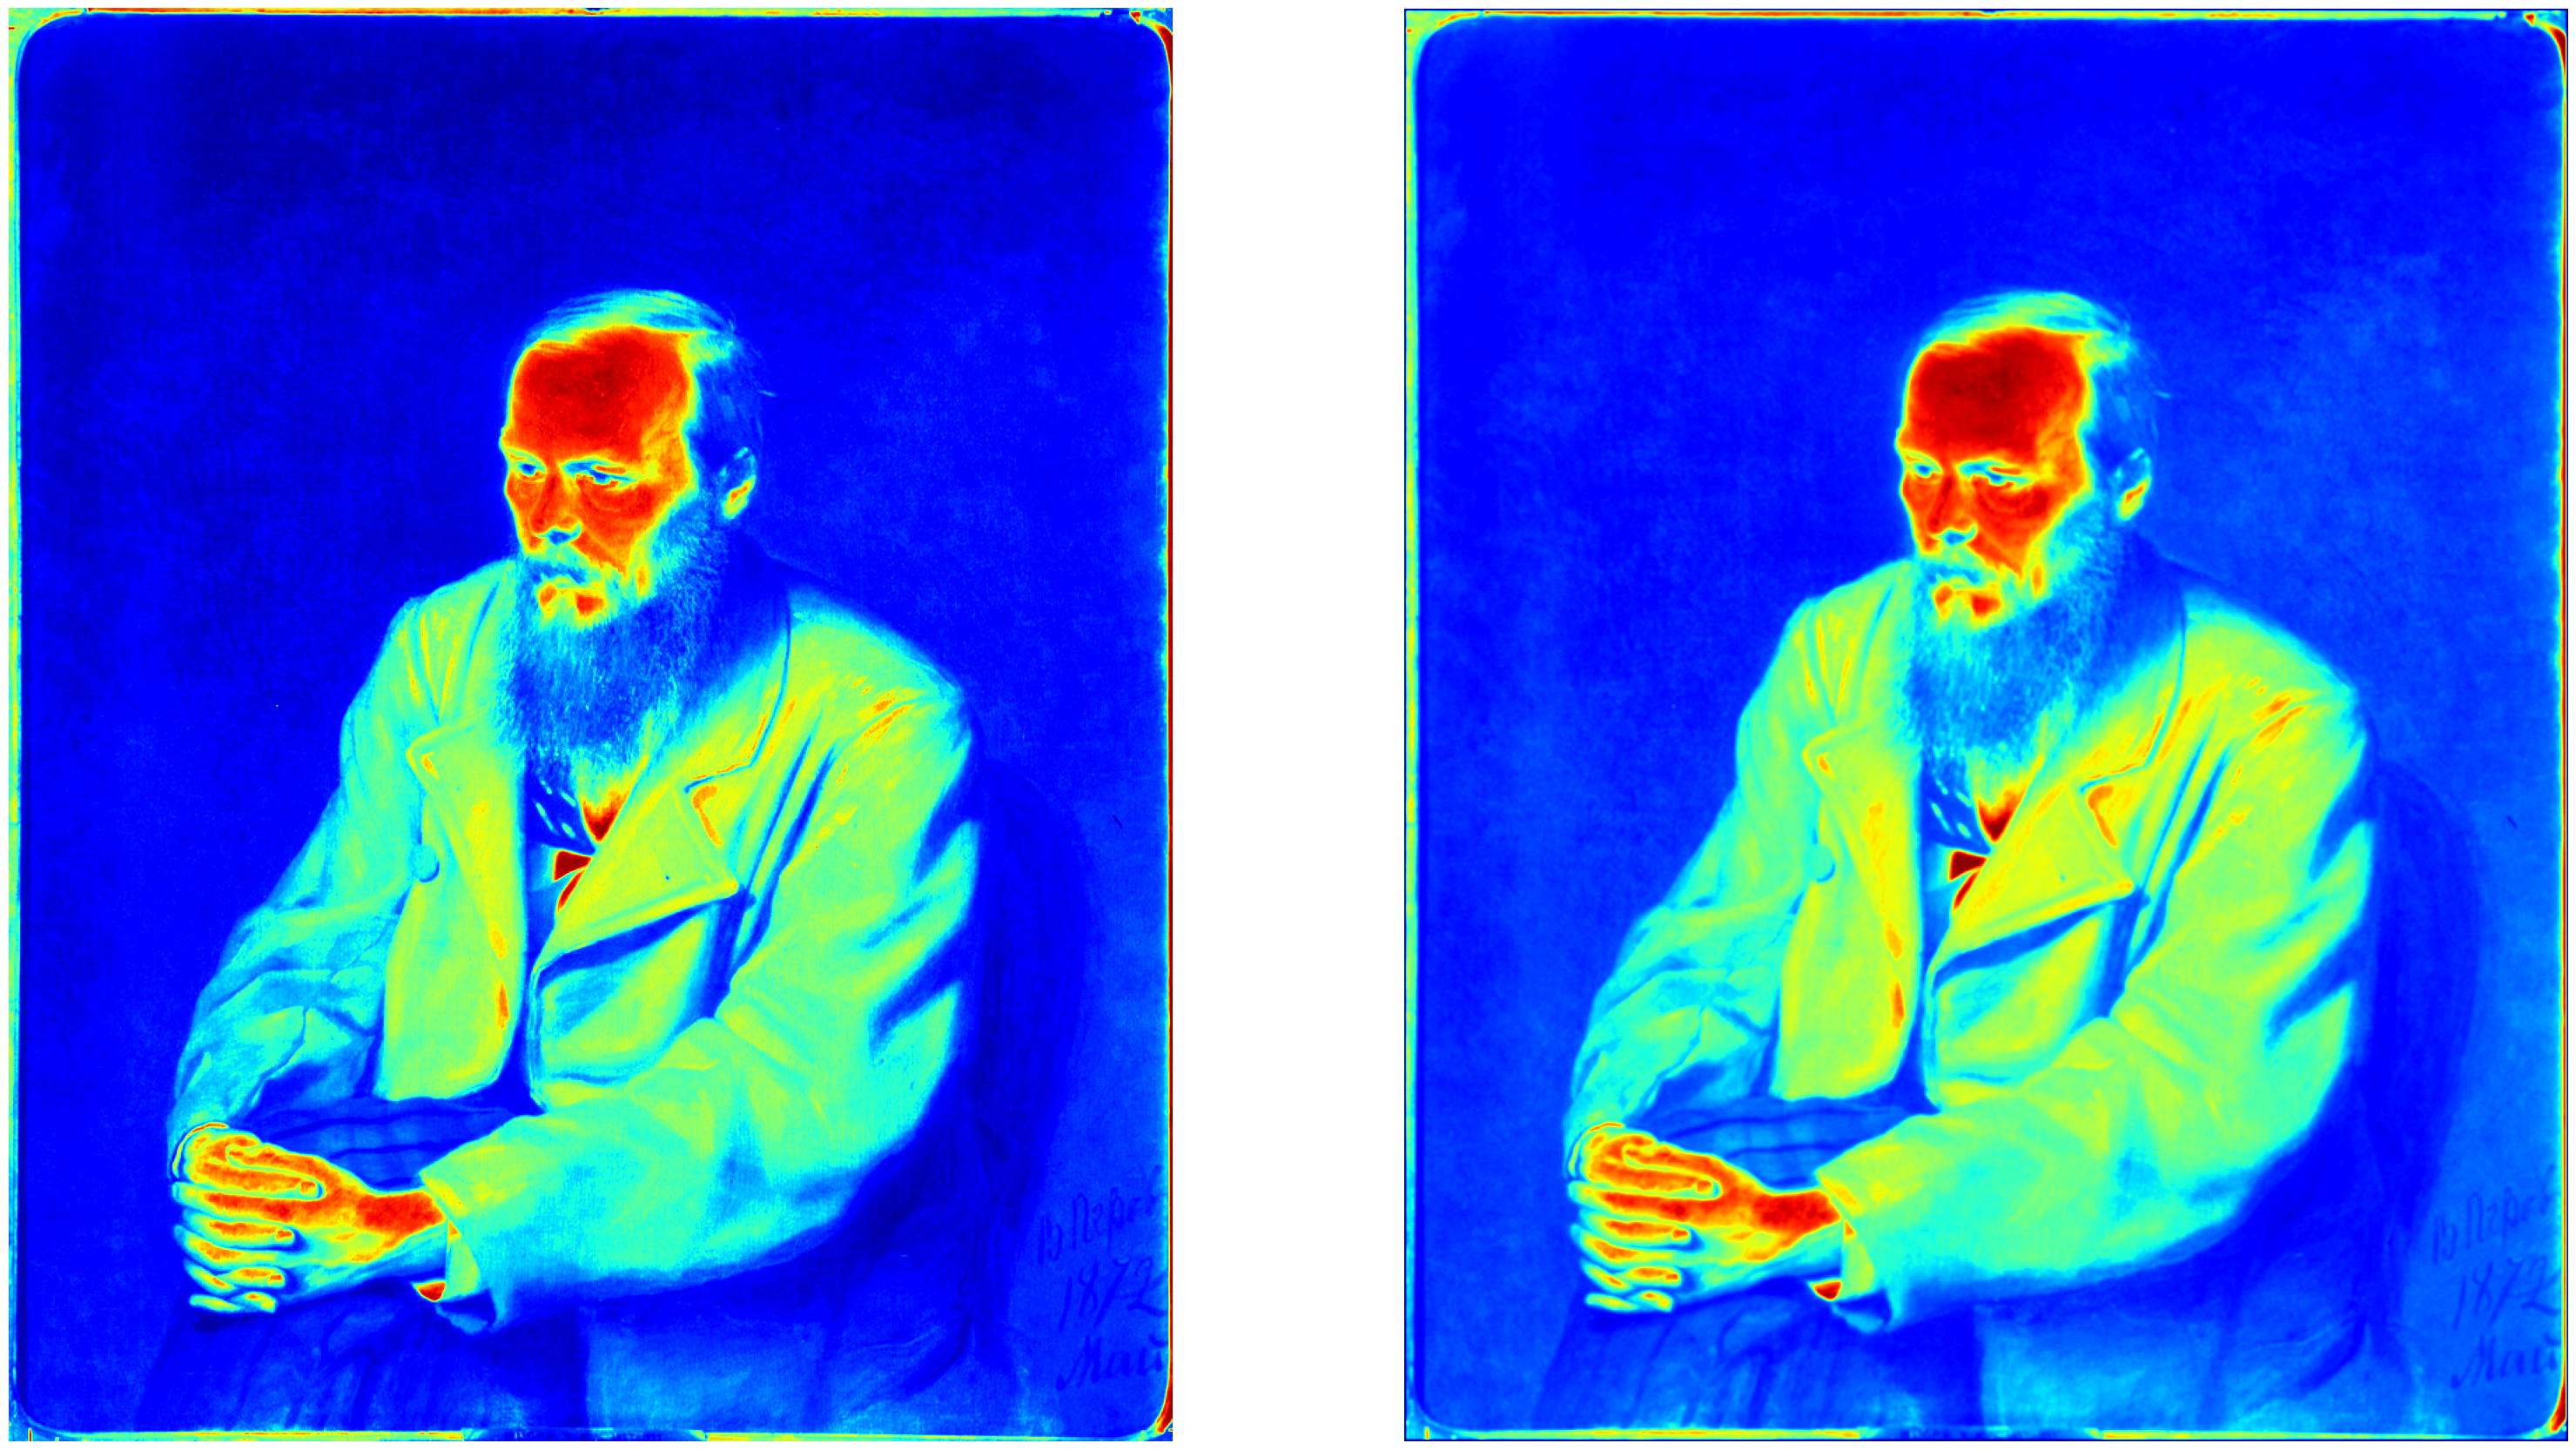

In [13]:
plt.figure(figsize = (100,100))

plt.subplot(151)
plt.imshow(img, cmap = 'jet')
plt.axis('off')

plt.subplot(152)
plt.imshow(conv_im, cmap = 'jet')
plt.axis('off')


In [14]:
# convolution works fine(ig) as we see with the help of jet colourmap

In [15]:
noise = imageio.imread('images/gradient_noise.png')

In [16]:
noconv = convolution(noise, median_filter)

(-0.5, 321.5, 321.5, -0.5)

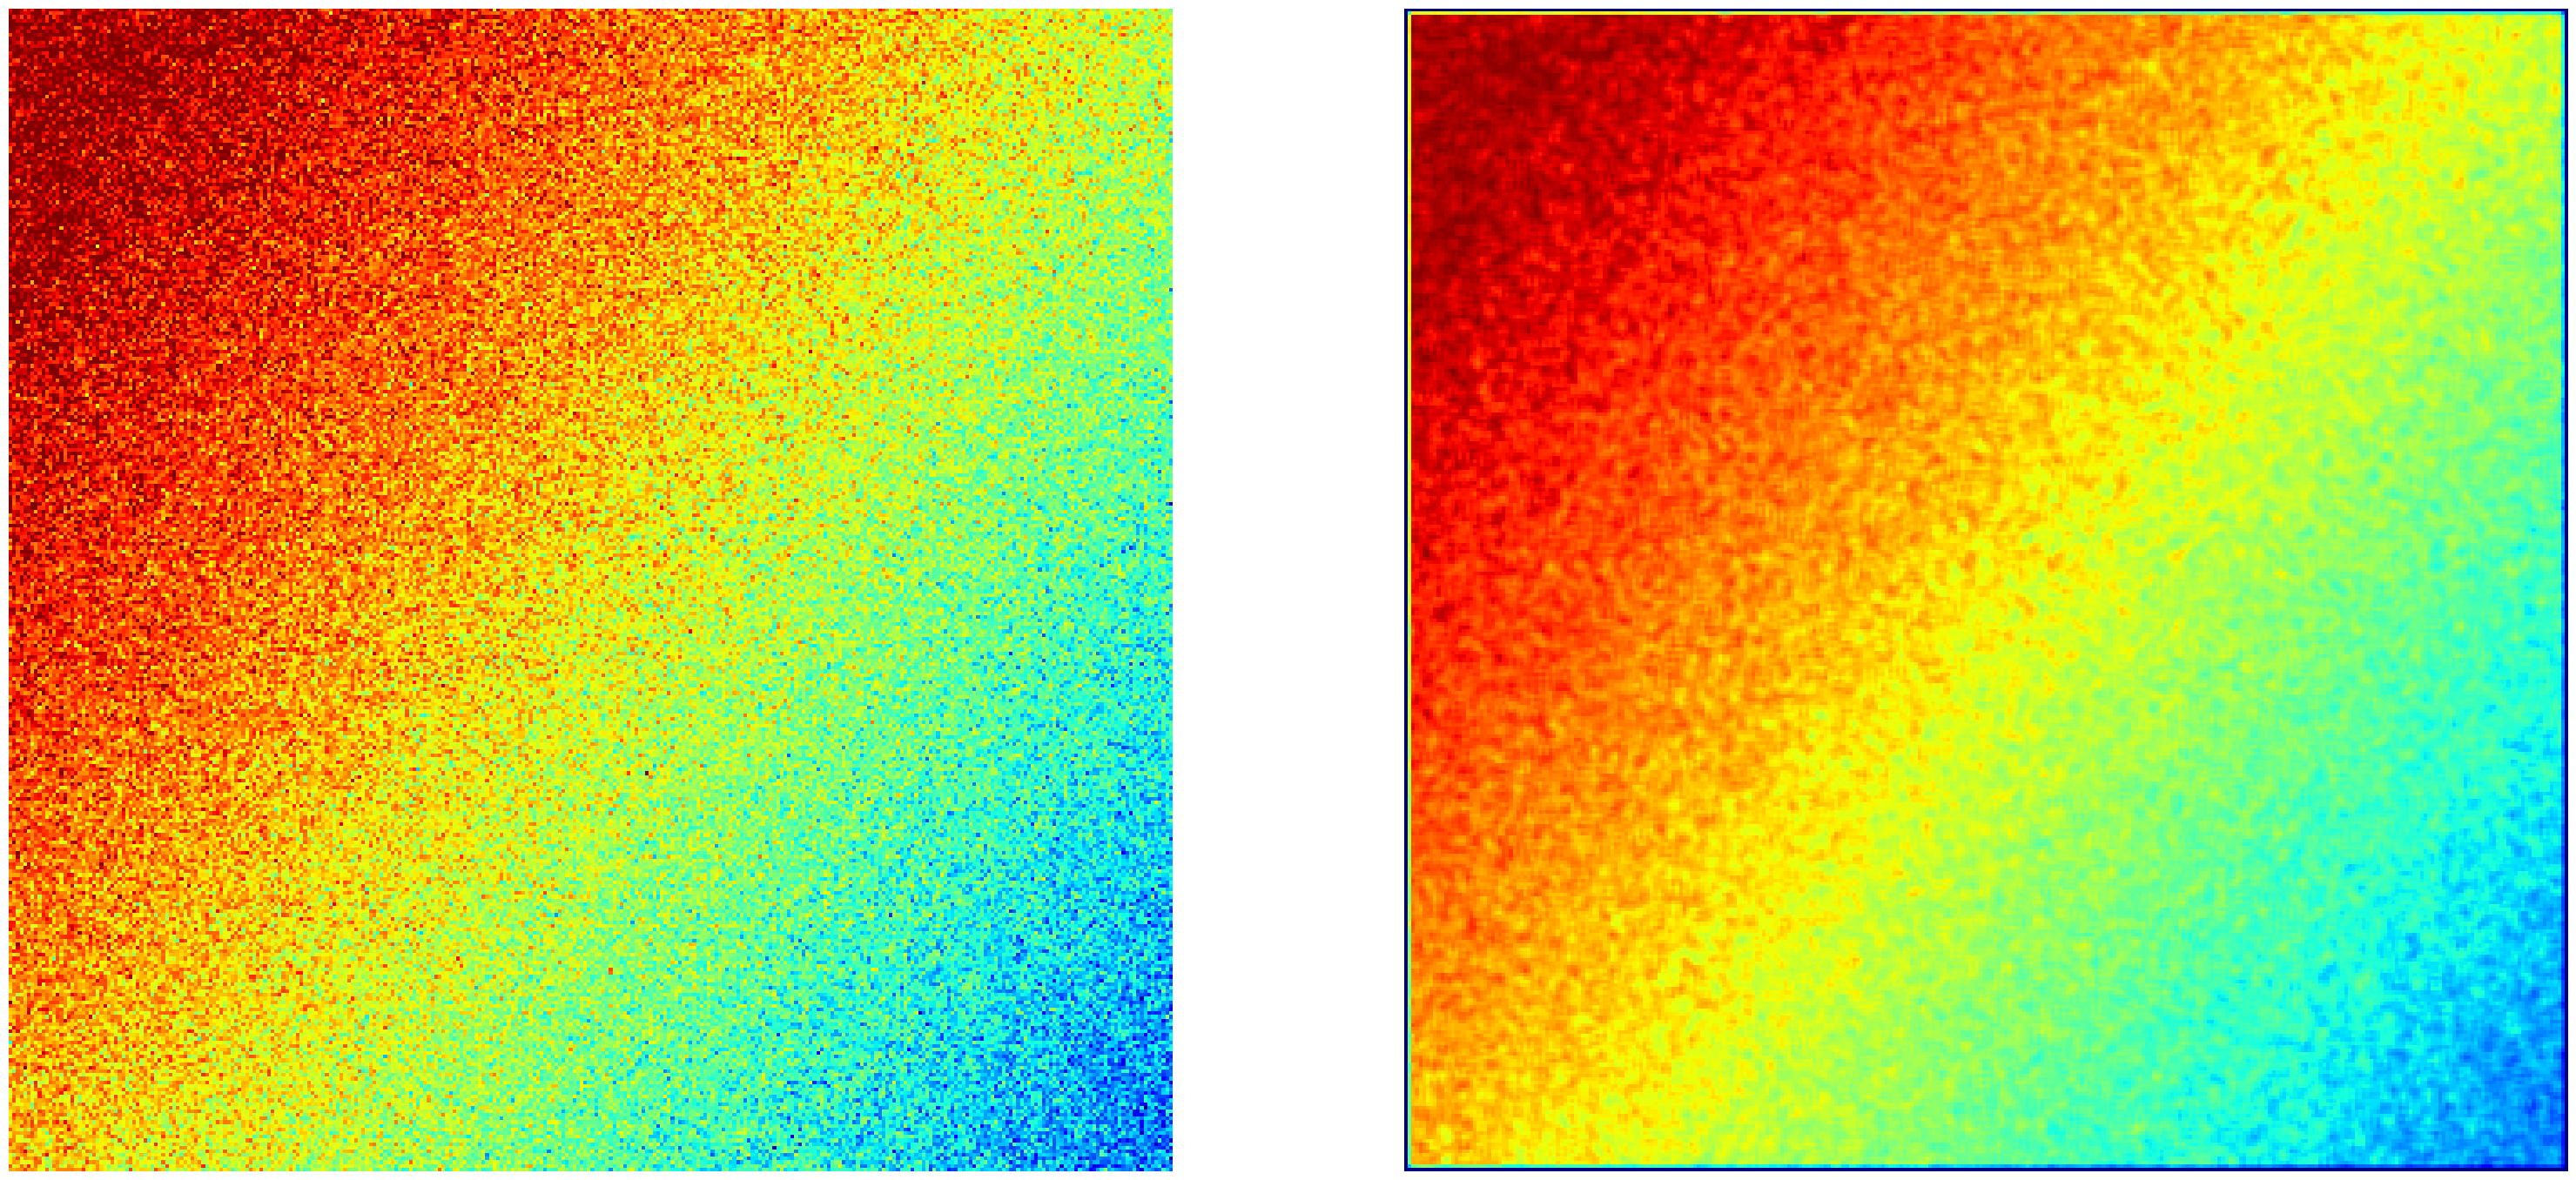

In [20]:
plt.figure(figsize = (100,100))

plt.subplot(151)
plt.imshow(noise, cmap = 'jet')
plt.axis('off')

plt.subplot(152)
plt.imshow(noconv, cmap = 'jet')
plt.axis('off')

In [19]:
# the only problem here is that the zeroes from padding dont blend consistently in the convolved noise image

In [21]:
#helpfull info: https://www.allaboutcircuits.com/technical-articles/two-dimensional-convolution-in-image-processing/